# __Prueba 1: Análisis de Sentimientos de Twitter__

## Contexto
A continuación se presenta un problema clásico en el análisis de texto: _Extraer la polaridad de sentimiento asociado a un texto_.

Para esto, utilizaremos una base de datos provenientes de CrowdFlower que se entrega como archivo adjunto para esta prueba bajo el nombre de `training_tweets.csv`.

Para descargar los datos puede ejecutar el siguiente código:
```bash
wget https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv
```
El objetivo general de esta prueba es alcanzar el mejor desempeño posible para clasificar si un tweet tiene una polaridad positiva o negativa en cuanto al sentimiento que expresa.


Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso. De esta manera evitaremos que los modelos aprendan información sobre el conjunto de validación.


## Objetivos
Para alcanzar el objetivo general, su trabajo se puede desagregar en los siguientes puntos:
<ol>
<li>Generar un análisis exploratorio sobre los datos contenidos en el DataFrame,
considerando palabras más comunes y distribución de las clases en el vector
objetivo.</li>
<li>Preprocesamiento de Texto:
  <ul>
    <li>Para trabajar adecuadamente con texto, debemos preprocesar y posteriormente representar cada oración como un conjunto de características.</li>
    <li>Para preprocesar los tweets, debemos transformarlos a lower case. Un problema recurrente en el análisis de texto es la alta ocurrencia de palabras comunes. Se recomienda eliminarlas mediante la declaración de stopwords. Para generar la exclusión de stopwords, podemos utilizar la librería `nltk` (Natural Language ToolKit) y descargar los stopwords con la siguiente instrucción.</li>

```python
import nltk
nltk.download('stopwords')
```
</li>
<li>

Puede refinar los atributos a capturar mediante el proceso de __lemantización__ (la
reducción de variadas palabras con un tronco léxico común; ejemplo: _Organización,
Organiza, y Organizado_ presentan `organi_` como tronco léxico en común) o
__Stemming__ (la reducción de una palabra a una expresión generalizable). Cabe
destacar que ésta última carece de análisis morfológico del lenguaje.</li>
<li>

Posterior a la refinación y preprocesamiento de las palabras, podemos representar
cada oración en una matriz (o corpus) que permitirá reflejar la cantidad de
ocurrencias de $W_i$ palabra en un registro. Para ello, pueden hacer uso de las librerías y
de preprocesamiento `sklearn.feature_extraction.text.CountVectorizer` o
`sklearn.feature_extraction.text.TfidfVectorizer`. De esta manera,
tendremos un conjunto de características es mediante la frecuencia de ocurrencia de
una palabra o término en el texto</li>
</ul>
</li>
<li>
Preparación del vector objetivo y las matrices de entrenamiento y validación:
<ul>
<li>Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello
deberá generar la recodificación de cada una de las clases en una de las dos
emociones:</li>
<table width="80%" style="margin: 20px 0px 20px 0px">
<tr><th>Original</th><th>Recodificación</th></tr>
<tr><td>'worry'</td><td>Negativa</td></tr>
<tr><td>'happiness'</td><td>Positiva</td></tr>
<tr><td>'sadness'</td><td>Negativa</td></tr>
<tr><td>'love'</td><td>Positiva</td></tr>
<tr><td>'surprise'</td><td>Positiva</td></tr>
<tr><td>'fun'</td><td>Positiva</td></tr>
<tr><td>'relief'</td><td>Positiva</td></tr>
<tr><td>'hate'</td><td>Negativa</td></tr>
<tr><td>'empty'</td><td>Negativa</td></tr>
<tr><td>'enthusiasm'</td><td>Positiva</td></tr>
<tr><td>'boredom'</td><td>Negativa</td></tr>
<tr><td>'anger'</td><td>Negativa</td></tr>
</table>
<li>Si el tweet está asignado como <code>neutral</code>, clasifíquelo aleatoriamente entre positivo o
negativo.</li>
</ul>
</li>
<li>Entrenamiento de modelos:

- En base a los modelos vistos en clase, implemente por lo menos 5. Para cada
uno de ellos justifique la elección de hiper parámetros. Si implementa
búsqueda de grilla para cada uno de ellos, defina el rango de valores a tomar
en cada hiper parámetro.
- Reporte el desempeño de cada modelo en las muestras de entrenamiento y
validación. Comente sobre la capacidad de generalización de cada uno de
ellos haciendo uso de los conceptos vistos en el curso.</li>
<li>Seleccione los 2 mejores modelos, serialicelos y envíalos a evaluación. Recuerde que
el modelo serializado debe ser posterior al <code>fit</code>, para poder ejecutar <code>predict</code> en los
nuevos datos.</li>

</ol>


## __Hito 1__

### Preliminares
Vemos que nos enfrentamos a un problema de clasificación, donde nuestro vector objetivo binario corresponderá a si una cadena de texto corresponde a un sentimiento Positivo o Negativo.

Para atacar el problema realizaremos primero un preprocesamiento de los datos, usando `TfidVectorizer` de `sklearn.feature_extraction.text` para convertir el texto plano a matrices que nos serviran como atributos para el modelo. Refactorizaremos el atributo `'sentiment'` según las especificaciones y aleatorizando el valor `neutral` según un `GaussianNB` entrenado con el resto de los sentimientos. Luego haremos un análisis gráfico del vector objetivo frente a la ocurrencia de las palabras.

Finalmente implementaremos 5 modelos usando distintos algoritmos, defieniendo para cada uno los hiperparámetros que correspondan y usando una búsqueda de grilla con validación cruzada cada vez que sea posible. Estos son:
1. `LogisticRegression`:
   - `penalty`: `['l2', 'l1', 'elasticnet']`
   - `fit_intercept`: `[True, False]`
   - `class_weight`: `[None, 'balanced', {'0': .4, '1': .5}, {'1': .4, '0': .5}]`
2. `GDA`:
   - `priors`: `[[.5, .5], [.33, .66], [.66, .33]]`
3. `SVC`
   - `class_weight`: `[None, 'balanced', {'0': .4, '1': .5}, {'1': .4, '0': .5}]`
   - `kernel`: `['rbf', 'poly', 'linear', 'sigmoid']`
   - `C`: `[0.1, 1, 10, 100, 1000]`
   - `gamma`: `[0.000001, 0.001, 0.1, 0.5, 1]`
4. `Decision Tree con GradientBoost`:
   - `learning_rate`: `[0.01, 0.1, 0.5]`
   - `n_estimators`: `[100, 500, 1000, 2000]`
   - `subsample`: `[0.2,0.5,0.8]`
5. `VotingClassifier`: Ensamblado con los modelos anteriores.


### Aspectos Computacionales

Importamos las librerías a utilizar

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import nltk

sentimientosPositivos = ['happiness', 'love', 'surprise', 'fun', 'relief', 'enthusiasm']
sentimientosNegativos = ['worry', 'sadness', 'hate', 'empty', 'boredom', 'anger']

In [52]:
df = pd.read_csv('training_tweets.csv').drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    30000 non-null  object
 1   sentiment  30000 non-null  object
dtypes: object(2)
memory usage: 468.9+ KB


### Análisis exploratorio y Feature Engineering de espacio de atributos

Importados los datos haremos la recodificación de `'content'`, aparte de la recodificación de palabras agregaremos mas metadata del atributo como:
- la cantidad de palabras
- el largo en caractéres

Además, haremos una reescritura de los hastags y menciones a `'@@@'` y `'###'` respectivamente cosa de evitar que nuestro modelo se sesgue con los usuarios/hashtags que se les da mas odio o positividad y a la vez manteniendo la información de cuantas menciones y hashtags tiene el tweet. 

In [53]:
# Agregamos las columnas
df['n_words'] = df['content'].apply(lambda x: len(x.split()))
df['n_chars'] = df['content'].apply(lambda x: len(x))
# Empezamos la refactorización del vector objetivo
df['sentiment_positive'] = df['sentiment'].apply(lambda x: 1 if x in sentimientosPositivos else 0 if x in sentimientosNegativos else -1)

In [54]:
# Reemplazar las menciones y hashtags por una palabra
df['content'] = df['content'].apply(lambda x: re.sub(r'@\w+', '@arroba', x))
df['content'] = df['content'].apply(lambda x: re.sub(r'#\w+', '#hashtag', x))


Revisamos la pérdida de datos

<AxesSubplot:>

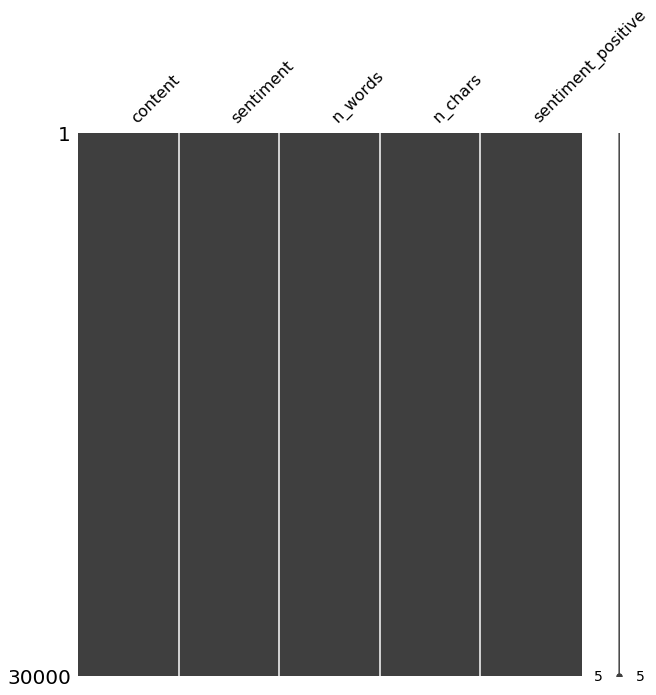

In [5]:
msno.matrix(df, figsize=(10, 10))

Vemos que no hay datos perdidos en la muestra lo que es bastante bueno.

Luego implementaremos la refactorización de la cadena de texto a matrices usando `TfidfVectorizer`.

In [55]:
# Refactorizamos usando TfidfTransformer
tfidf = TfidfVectorizer(stop_words=nltk.corpus.stopwords.words('spanish'), max_features=10000)
tfidfMatrix = tfidf.fit_transform(df['content'])

In [56]:
# Agregamos el Dataframe de features
refactoredDf = pd.concat([df.drop(columns=['content']), pd.DataFrame(tfidfMatrix.toarray(), columns=tfidf.get_feature_names())], axis=1)


### Análisis y refactoring de vector objetivo

Primero haremos la aleatorización de la columna neutral, para ello usaremos un modelo de NaiveBayes con Gaussianas.

Graficamos el vector objetivo

<AxesSubplot:xlabel='sentiment_positive', ylabel='count'>

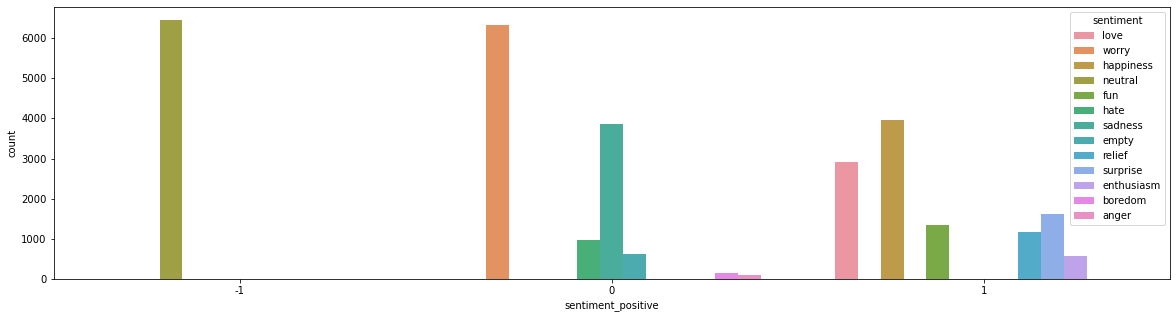

In [59]:
plt.figure(figsize=(20,5))
sns.countplot(x='sentiment_positive', hue='sentiment', data=refactoredDf)


Vemos que los sentimientos positivos tienen una distribución un poco mas pareja que los sentimientos negativos, ya que hay muy pocos ejemplos de `'boredom'` y `'anger'` comparados con las de `'worry'`.

Vemos que hay muchos tweets como `'neutral'`, lo que indica que la aleatorización es importante para le desempeño final del modelo. Continuamos con el entrenamiento del modelo para aleatorizar estas observaciones.

In [60]:
# Separamos las muestra según si son neutrales o no
nonNeutral = refactoredDf[refactoredDf['sentiment_positive'] != -1].drop(columns=['sentiment'])
neutral = refactoredDf[refactoredDf['sentiment_positive'] == -1].drop(columns=['sentiment', 'sentiment_positive'])
# Separamos las muestras de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(nonNeutral.drop(columns=['sentiment_positive']), nonNeutral['sentiment_positive'], test_size=0.33, random_state=42)


In [61]:
# Entrenamos el modelo
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
# Reportamos las métricas
print(classification_report(y_test, nbModel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59      3957
           1       0.59      0.66      0.62      3815

    accuracy                           0.61      7772
   macro avg       0.61      0.61      0.61      7772
weighted avg       0.61      0.61      0.61      7772



Vemos que a lo menos es mejor que una predicción aleatoria equi-probable por lo que continuamos a la refactorizacion de los valores neutrales en `'sentiment'`

In [62]:
# guardamos las predicciones de las clases 'neutral'
neutral['sentiment_positive'] = nbModel.predict(neutral)
# Guardamos el espacio de atributos final
refactoredDf = pd.concat([neutral, nonNeutral])

In [63]:
# Verificamos que nuestro vector objetivo sea binario
refactoredDf['sentiment_positive'].value_counts()

1    15325
0    14675
Name: sentiment_positive, dtype: int64